In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('tennis.csv')
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [4]:
df.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [5]:
df.isna().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(14, 5)

In [8]:
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


As you can see we have to label encode the entire dataset

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df=df.apply(le.fit_transform)

In [11]:
df.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=112)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=100)

In [19]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [20]:
dt_pred=dt.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
print("Confusion Matrix: \n", confusion_matrix(y_test,dt_pred))
print("Classification Report: \n", classification_report(y_test,dt_pred))
print("Accuracy Score: ",accuracy_score(y_test,dt_pred))

Confusion Matrix: 
 [[1 0]
 [2 2]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5

Accuracy Score:  0.6


[Text(0.4444444444444444, 0.875, 'x[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.625, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

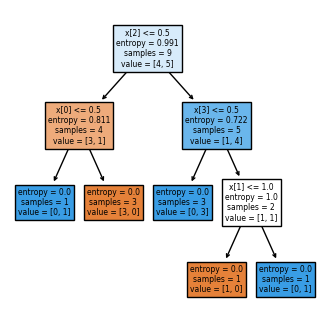

In [24]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4))
tree.plot_tree(dt,filled=True)